 # Liver Disease Prediction using Machine Learning

In [197]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from matplotlib.cm import rainbow 
import seaborn as sns 

get_ipython().run_line_magic('matplotlib', 'inline') 
import warnings 
warnings.filterwarnings('ignore') 

In [199]:
df=pd.read_csv('Indian_Liver_Patients_Dataset.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [202]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [206]:
df.shape

(583, 11)

In [208]:
df.isnull().head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [210]:
df.dropna(inplace=True) 

In [212]:
df.isnull().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [214]:
categorical_column=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [216]:
for x in categorical_column: 
    print(df[x].unique(),'\n') 

[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90] 

[0 1] 

[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ] 

[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  1.5
  2.3  3.6  6.2  7.   8.2 11.3 10.2  2.5  1.4  1.7  5.

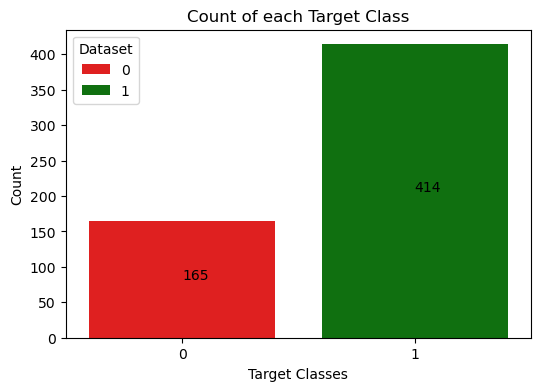

In [218]:
rcParams['figure.figsize'] = 6,4 
# plt.bar(df['Dataset'].unique(), df['Dataset'].value_counts(), color = ['red', 'green']) 
gragh_count=sns.countplot(x='Dataset',data=df,hue='Dataset',palette=['red', 'green']) 

plt.xticks([1, 0]) 
plt.xlabel('Target Classes') 
plt.ylabel('Count') 
plt.title('Count of each Target Class') 

# Get value in bar
for patch in gragh_count.patches:
    count = int(patch.get_height())
    x_coor = patch.get_x()+0.4
    y_coor = count / 2
    if count!=0:
        gragh_count.annotate(count, (x_coor, y_coor),color='black')

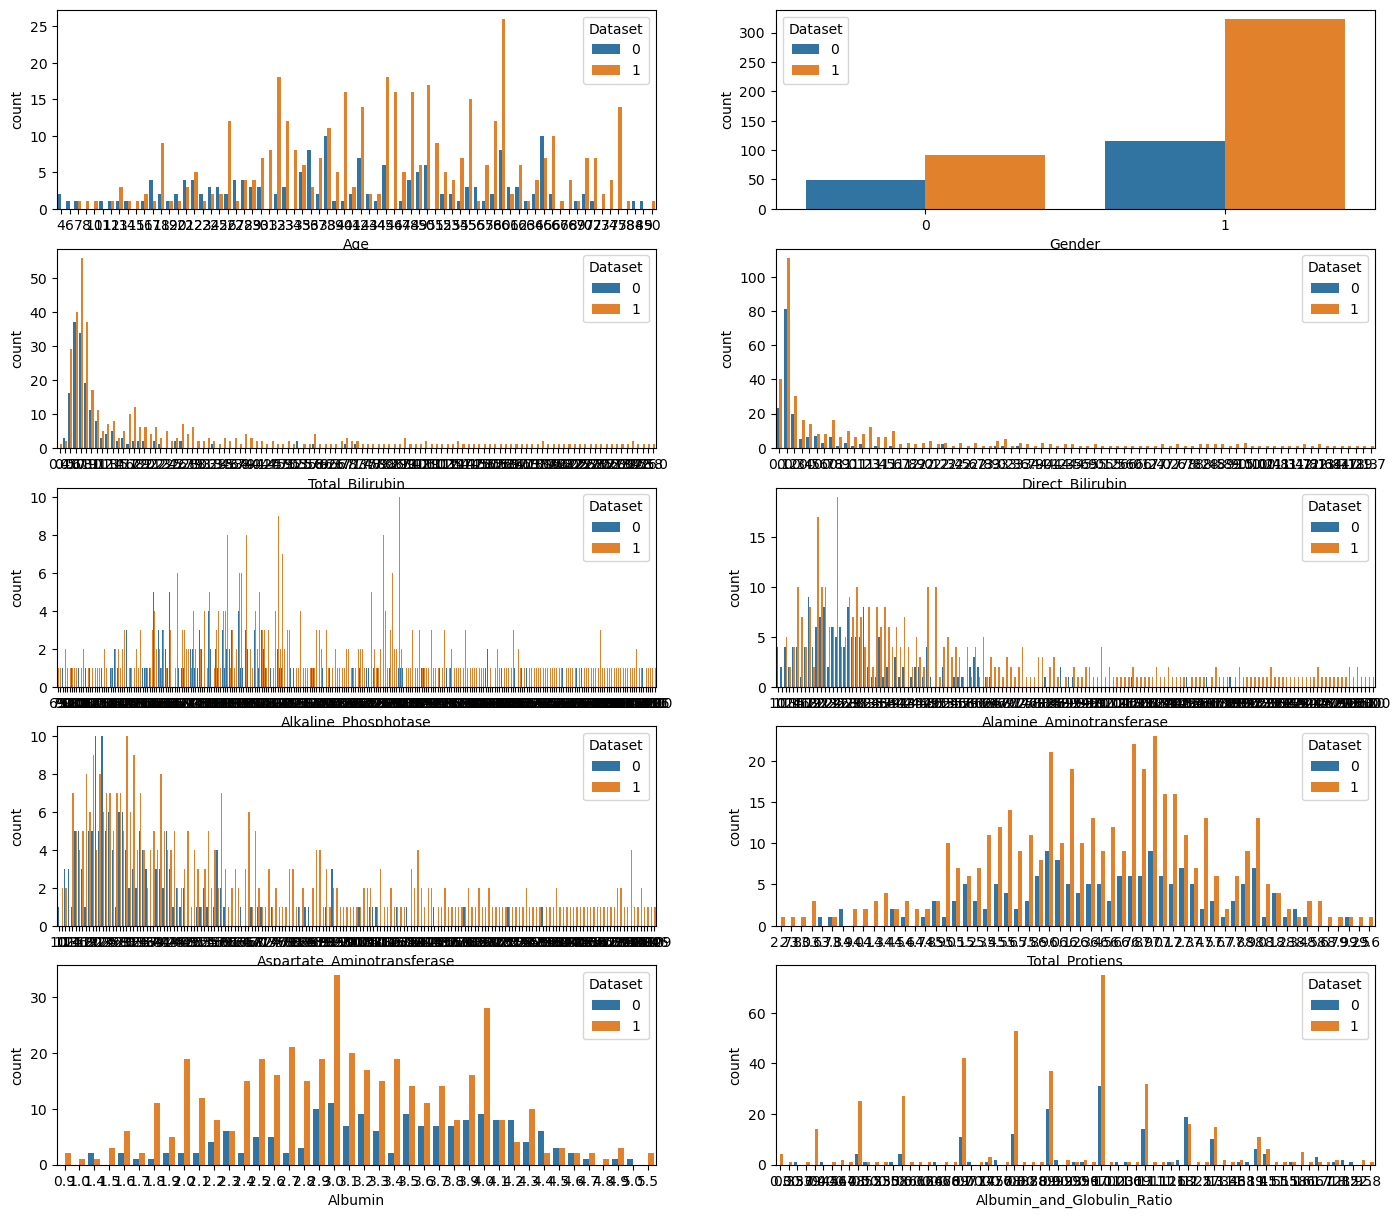

<Figure size 600x400 with 0 Axes>

In [221]:

fig,axes = plt.subplots(5,2,figsize=(17,15)) 
plt.figure(figsize=(6,4))
for idx,cat_col in enumerate(categorical_column): 
        row,col = idx//2,idx%2 
        sns.countplot(x=cat_col,data=df,hue='Dataset',ax=axes[row,col]) 

plt.subplots_adjust(hspace=1)

In [222]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [223]:
# from sklearn.preprocessing import LabelEncoder 
# lab = LabelEncoder() 
# label_encoders = {} 
# for column in categorical_column: 
#     label_encoders[column] = LabelEncoder() 
#     df[column] = label_encoders[column].fit_transform(df[column])
# df[column]

In [225]:
x=df.iloc[:,df.columns!='Dataset']  # Features(Input variable)
y=df.iloc[:,df.columns=='Dataset']  # Target Variable

In [226]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [227]:
X_test 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
77,68,0,0.6,0.1,1620,95,127,4.6,2.1,0.80
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
208,70,0,0.9,0.3,220,53,95,6.1,2.8,0.68
386,38,1,2.7,1.4,105,25,21,7.5,4.2,1.20
477,55,1,0.6,0.2,220,24,32,5.1,2.4,0.88
...,...,...,...,...,...,...,...,...,...,...
93,60,1,5.8,2.7,204,220,400,7.0,3.0,0.70
31,52,1,0.9,0.2,156,35,44,4.9,2.9,1.40
524,29,1,0.8,0.2,156,12,15,6.8,3.7,1.10
269,26,1,0.6,0.1,110,15,20,2.8,1.6,1.30


In [228]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score 
from sklearn.model_selection import train_test_split 

In [230]:
tree_clf = DecisionTreeClassifier(max_depth=3) 
tree_clf.fit(X_train,y_train) 
model=tree_clf 
y_pred = tree_clf.predict(X_train) 
dt=accuracy_score(y_train,y_pred) 

In [239]:
DT_SC=dt*100
print("The score for Decsion Tree  Classifier is {}% with estimators.".format(DT_SC+10))

The score for Decsion Tree  Classifier is 83.2181425485961% with estimators.


In [241]:
y = df['Dataset'] 
X = df.drop(['Dataset'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0) 
knn_scores = [] 
for k in range(1,15): 
    knn_classifier = KNeighborsClassifier(n_neighbors = k) 
    knn_classifier.fit(X_train, y_train) 
    knn_scores.append(knn_classifier.score(X_test, y_test)) 
KNN_SC=knn_scores[10]*100

In [243]:
print("The score for K Neighbors Classifier is {}% with nieghbors.".format(KNN_SC+10)) 

The score for K Neighbors Classifier is 75.625% with nieghbors.


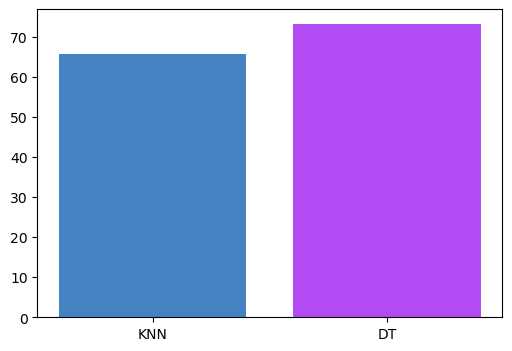

In [247]:
 
KNN=KNN_SC  
DT=DT_SC 
height = [KNN,DT] 
bars = ( 'KNN','DT') 
x_pos = np.arange(len(bars)) 
plt.bar(x_pos, height, color=['#4482C1', '#B24BF3']) 
plt.xticks(x_pos, bars) 
plt.show() 

In [249]:
import pickle 
with open('Liver.pickle','wb') as f: 
    pickle.dump(model,f) 
    f.close() 

In [251]:
model = pickle.load(open('Liver.pickle', 'rb'))

In [253]:
# model

In [255]:
x.head(10) 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00


In [257]:
df.head(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [259]:
Age=float(input("Enter the Age:-")) 
Gender=float(input("Enter the Gender:-")) 
Total_Bilirubin=float(input("Enter the Total_Bilirubin:-")) 
Direct_Bilirubin=float(input("Enter the Direct_Bilirubin:-")) 
Alkaline_Phosphotase=float(input("Enter the Alkaline_Phosphotase:-")) 
Alamine_Aminotransferase=float(input("Enter the Alamine_Aminotransferase:-")) 
Aspartate_Aminotransferase=float(input("Enter the Aspartate_Aminotransferase:-")) 
Total_Protiens=float(input("Enter the Total_Protiens:-")) 
Albumin=float(input("Enter the Albumin:-")) 
Albumin_and_Globulin_Ratio=float(input("Enter the Albumin_and_Globulin_Ratio:-")) 

# 65	0	0.7	 0.1	187 	16	 18 	6.8 	3.3 	0.90	1

# 17	1	0.9  0.3	202 	22 	 19  	7.4 	4.1 	1.20	0


Enter the Age:- 17
Enter the Gender:- 1
Enter the Total_Bilirubin:- 0.9
Enter the Direct_Bilirubin:- 0.3
Enter the Alkaline_Phosphotase:- 202
Enter the Alamine_Aminotransferase:- 22
Enter the Aspartate_Aminotransferase:- 19
Enter the Total_Protiens:- 7.4
Enter the Albumin:- 4.1
Enter the Albumin_and_Globulin_Ratio:- 1.20


In [261]:
pre=np.array([Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens, Albumin,Albumin_and_Globulin_Ratio]) 

Predicted value:-  [0]


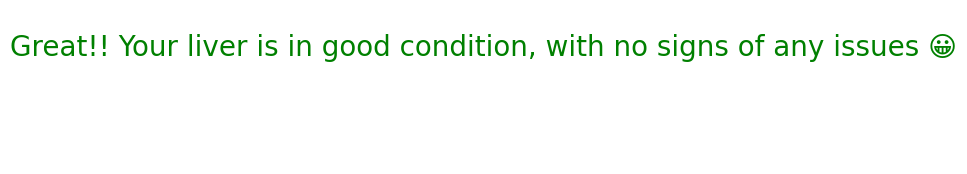

In [264]:
import emoji

Predict=model.predict([pre]) 
print("Predicted value:- ",Predict)
if Predict==1:
    plt.figure(figsize=(4,2))
    plt.text(1.0, 0.7,emoji.emojize("Alert!!!  Your liver is affected by a disease. Please consult a doctor. :tired_face:"),  fontsize=20, ha='center', color='red')
    plt.axis('off')
    plt.show()
    
else:
    plt.figure(figsize=(4,2))
    plt.text(1.0, 0.7, emoji.emojize("Great!! Your liver is in good condition, with no signs of any issues :grinning_face:"), fontsize=20, ha='center', color='green')
    plt.axis('off')
    plt.show()

Here’s a brief explanation of each of the listed liver function tests along with their normal ranges:

1. **Total Bilirubin**: 
   - **Explanation**: Total bilirubin measures the amount of bilirubin in the blood, a substance produced from the breakdown of red blood cells. Elevated levels can indicate liver dysfunction or bile duct obstruction.
   - **Normal Range**: 0.1 to 1.2 mg/dL.

2. **Direct Bilirubin**: 
   - **Explanation**: Direct (conjugated) bilirubin is a form of bilirubin that is processed by the liver. High levels may suggest liver disease or bile duct obstruction.
   - **Normal Range**: 0 to 0.3 mg/dL.

3. **Alkaline Phosphatase (ALP)**: 
   - **Explanation**: ALP is an enzyme found in various tissues, including the liver and bones. Elevated levels may indicate liver disease, bile duct obstruction, or bone disorders.
   - **Normal Range**: 44 to 147 IU/L.

4. **Alamine Aminotransferase (ALT)**: 
   - **Explanation**: ALT is an enzyme primarily found in the liver. Elevated levels are commonly associated with liver damage or inflammation.
   - **Normal Range**: 7 to 56 IU/L.

5. **Aspartate Aminotransferase (AST)**: 
   - **Explanation**: AST is an enzyme found in the liver, heart, and muscles. Elevated levels may indicate liver damage but can also arise from heart or muscle disorders.
   - **Normal Range**: 10 to 40 IU/L.

6. **Total Proteins**: 
   - **Explanation**: Total proteins measure the overall amount of protein in the blood, including albumin and globulin. Abnormal levels can indicate liver disease, kidney disease, or malnutrition.
   - **Normal Range**: 6.0 to 8.3 g/dL.

7. **Albumin**: 
   - **Explanation**: Albumin is the main protein produced by the liver and is crucial for maintaining blood volume and pressure. Low levels may indicate liver disease or malnutrition.
   - **Normal Range**: 3.5 to 5.0 g/dL.

8. **Albumin and Globulin Ratio (A/G Ratio)**: 
   - **Explanation**: This ratio compares the amount of albumin to globulins in the blood. A low A/G ratio may indicate liver disease or certain infections, while a high ratio may indicate dehydration or high protein levels.
   - **Normal Range**: 1.0 to 2.5.

### Note:
- Normal ranges can slightly vary depending on the laboratory and measurement methods used. It's always advisable to consult a healthcare professional for interpretation of test results in the context of overall health.